<a href="https://colab.research.google.com/github/Riya23160/PracticeProjects/blob/main/MEdicalInsurancePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
df=pd.read_csv('/content/insurance.csv')

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
df.shape

(1338, 7)

In [45]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
df.value_counts('region')

,count
region,
southeast,364
northwest,325
southwest,325
northeast,324


In [48]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
df=df.replace({'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3},'sex':{'male':0,'female':1},'smoker':{'no':0,'yes':1}})

/tmp/ipython-input-2622158857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3},'sex':{'male':0,'female':1},'smoker':{'no':0,'yes':1}})


In [50]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


Text(0.5, 1.0, 'Correlation')

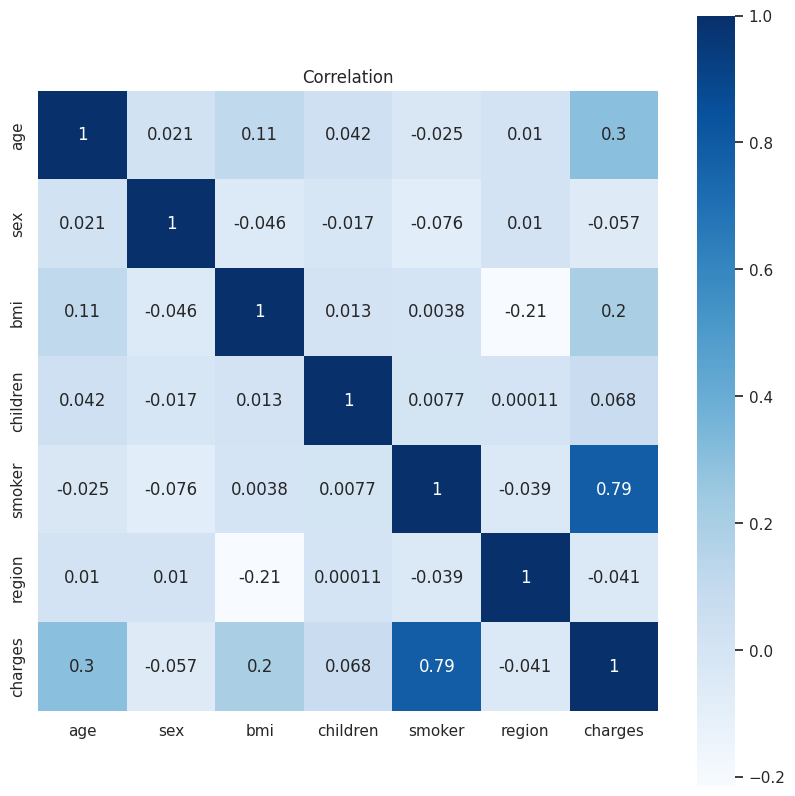

In [51]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='Blues',annot=True,square=True)
plt.title('Correlation')

/tmp/ipython-input-2849676270.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

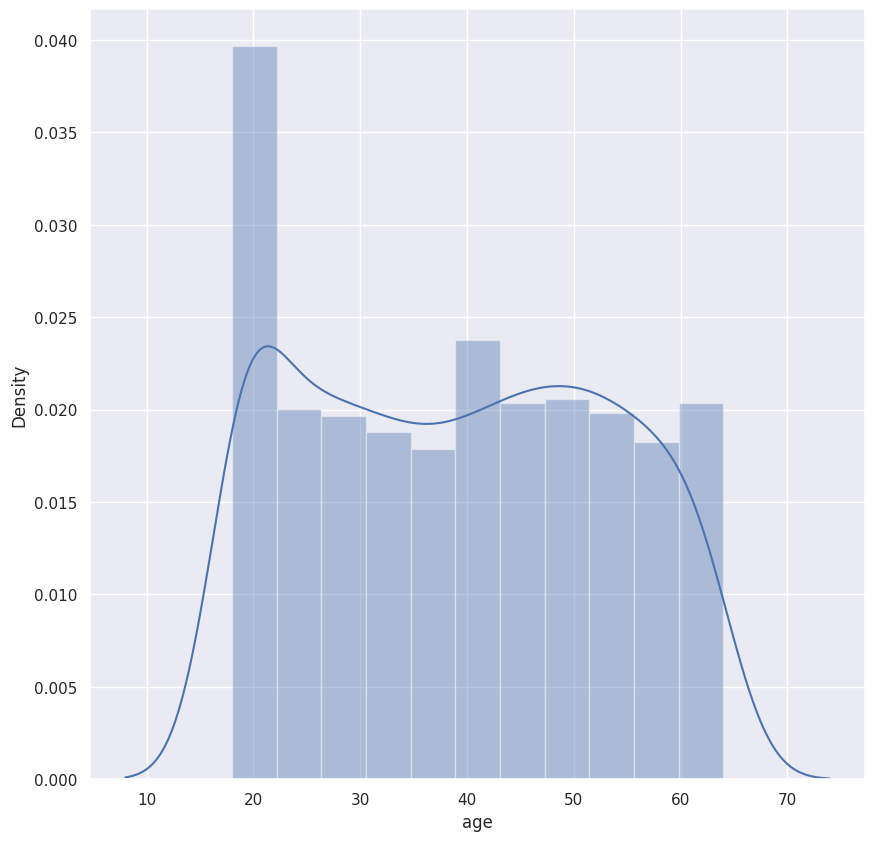

In [52]:
sns.set()
plt.figure(figsize=(10,10))
sns.distplot(df['age'])

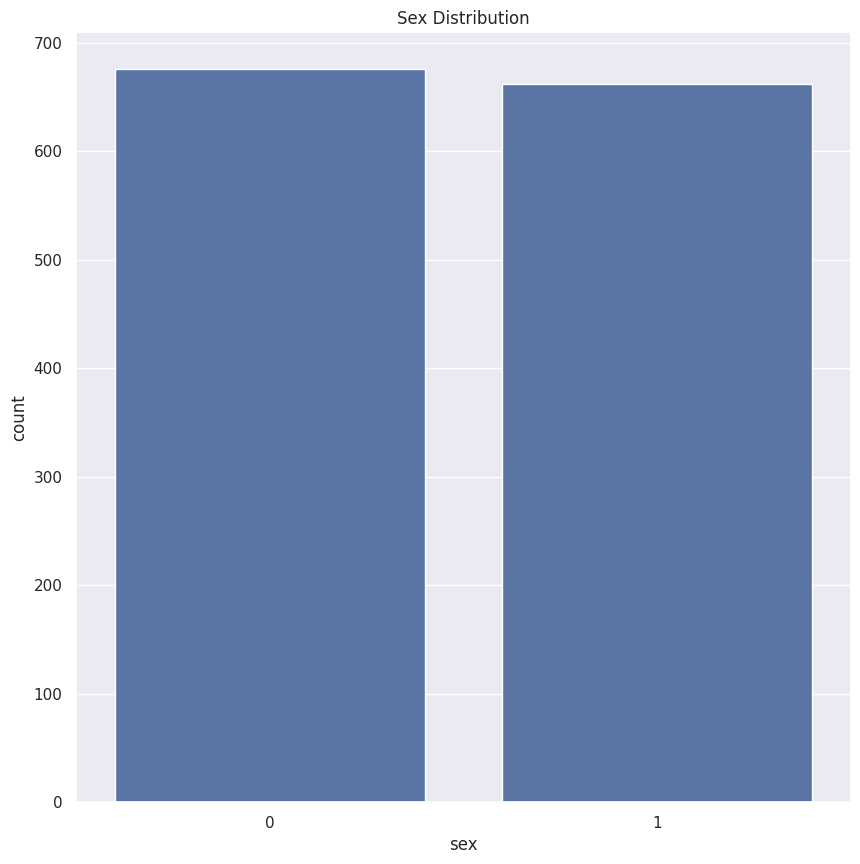

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

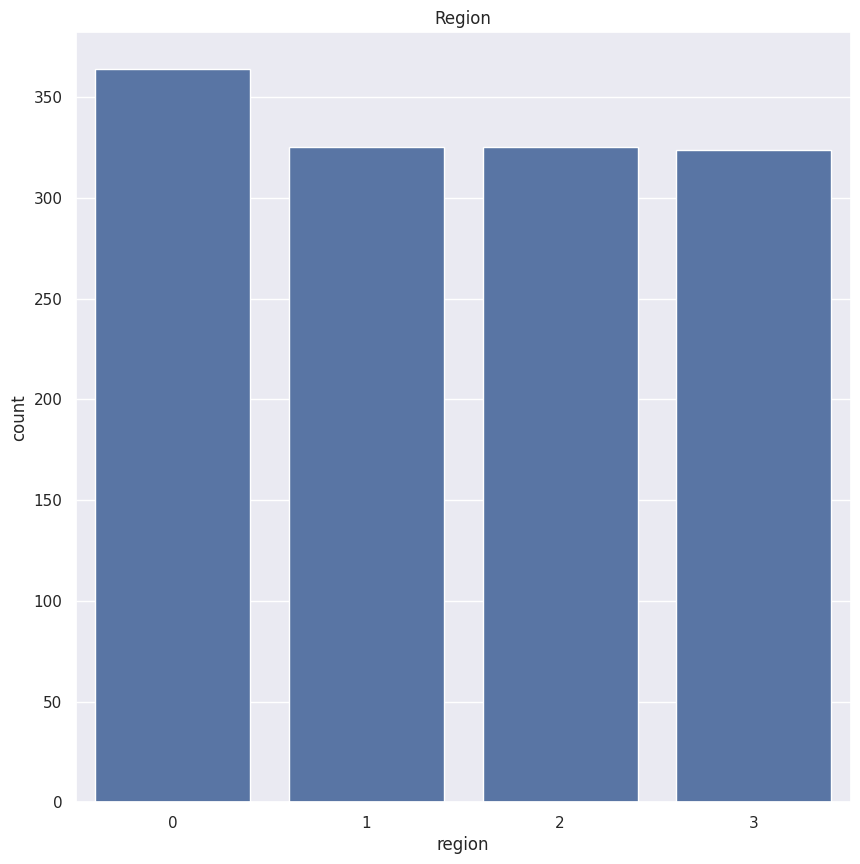

In [54]:
plt.figure(figsize=(10,10))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [55]:
x=df.drop('charges',axis=1)
y=df['charges']

In [56]:
print(x,y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       2
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       1
4      32    0  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       1
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       2
1337   61    1  29.070         0       1       1

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
print(x.shape,x_test.shape,x_train.shape)

(1338, 6) (268, 6) (1070, 6)


In [59]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [60]:
train_predict=model.predict(x_train)

In [61]:
error=metrics.r2_score(y_train,train_predict)
print(error)

0.7513870264571597


In [62]:
test_predict=model.predict(x_test)
score=metrics.r2_score(y_test,test_predict)
print(score)

0.7441422677793177


In [63]:
input=(31,1,25.74,0,1,0)
input=np.asarray(input)
input=input.reshape(1,-1)
predict=model.predict(input)
print(predict)

[27748.18323682]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
